<a href="https://colab.research.google.com/github/FeTPiva/trab_big_data_pos/blob/main/proj_big_data_polaridade_trump_tweets_com_Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Spark - Utilização do Spark

In [ ]:
#link do dataset
#https://www.reddit.com/r/datasets/comments/gxsdqk/archive_of_43475_donald_trump_twitter_screenshots/
#versão só textos ~ https://drive.google.com/file/d/1HE_ezCVWG7JSy5fDSASAmrkmUUbPpWAC/view

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Instalação do Spark
!pip install pyspark

     |████████████████████████████████| 204.2MB 42kB/s 
     |████████████████████████████████| 204kB 45.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=270247ce823c5d216cb9b7011a2a28e35fc3e1695c2eb1af326497a4a7c1c997
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("uso-do-spark").getOrCreate()

In [4]:
#Carrega o dataframe com os dados
df = spark.read.csv("/content/drive/MyDrive/pos/big/tweets_11-06-2020.csv", inferSchema=True, header=True)

In [5]:
df.printSchema()


root
 |-- id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- isRetweet: string (nullable = true)
 |-- isDeleted: string (nullable = true)
 |-- device: string (nullable = true)
 |-- favorites: string (nullable = true)
 |-- retweets: string (nullable = true)
 |-- date: string (nullable = true)



In [6]:
df.show(n=5)

+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|                 id|                text|isRetweet|isDeleted|            device|favorites|retweets|               date|
+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|  98454970654916608|Republicans and D...|        f|        f|         TweetDeck|       49|     255|2011-08-02 18:07:48|
|1234653427789070336|I was thrilled to...|        f|        f|Twitter for iPhone|    73748|   17404|2020-03-03 01:34:50|
|1218010753434820614|RT @CBS_Herridge:...|        t|        f|Twitter for iPhone|        0|    7396|2020-01-17 03:22:47|
|1304875170860015617|The Unsolicited M...|        f|        f|Twitter for iPhone|    80527|   23502|2020-09-12 20:10:58|
|1218159531554897920|RT @MZHemingway: ...|        t|        f|Twitter for iPhone|        0|    9081|2020-01-17 13:13:59|
+-------------------+-----------

In [7]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|summary|                  id|                text|           isRetweet|           isDeleted|              device|           favorites|           retweets|                date|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|  count|               55090|               55090|               55083|               55084|               55086|               55086|              55087|               55088|
|   mean|7.843718978093134...|                null|   761.8461538461538|   298.8333333333333|               266.5|  27520.781352891307|   8094.24305310638|   2075.260570304818|
| stddev|3.774074382608727...|                null|   767.6749362147416|   461.4674058551337|   376.8879143724298| 

In [8]:
df.show()

+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|                 id|                text|isRetweet|isDeleted|            device|favorites|retweets|               date|
+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|  98454970654916608|Republicans and D...|        f|        f|         TweetDeck|       49|     255|2011-08-02 18:07:48|
|1234653427789070336|I was thrilled to...|        f|        f|Twitter for iPhone|    73748|   17404|2020-03-03 01:34:50|
|1218010753434820614|RT @CBS_Herridge:...|        t|        f|Twitter for iPhone|        0|    7396|2020-01-17 03:22:47|
|1304875170860015617|The Unsolicited M...|        f|        f|Twitter for iPhone|    80527|   23502|2020-09-12 20:10:58|
|1218159531554897920|RT @MZHemingway: ...|        t|        f|Twitter for iPhone|        0|    9081|2020-01-17 13:13:59|
|1217962723234983937|RT @WhiteHo

In [9]:
df.createOrReplaceTempView('tbl')

In [84]:
resultados_full = spark.sql("SELECT * FROM tbl where isRetweet = 'f'")
resultados_full.show()

+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|                 id|                text|isRetweet|isDeleted|            device|favorites|retweets|               date|
+-------------------+--------------------+---------+---------+------------------+---------+--------+-------------------+
|  98454970654916608|Republicans and D...|        f|        f|         TweetDeck|       49|     255|2011-08-02 18:07:48|
|1234653427789070336|I was thrilled to...|        f|        f|Twitter for iPhone|    73748|   17404|2020-03-03 01:34:50|
|1304875170860015617|The Unsolicited M...|        f|        f|Twitter for iPhone|    80527|   23502|2020-09-12 20:10:58|
|1315779944002199552|“I’m running as a...|        f|        f|Twitter for iPhone|   149007|   34897|2020-10-12 22:22:39|
|1223640662689689602|Getting a little ...|        f|        f|Twitter for iPhone|   285863|   30209|2020-02-01 16:14:02|
|1319501865625784320|https://t.c

In [115]:
#pegando textos do Trump
resultados = spark.sql("SELECT replace(text,'@','') as text FROM tbl where isRetweet = 'f' and text not like '%http%' ")

In [116]:
resultados.show(500)

+--------------------+
|                text|
+--------------------+
|Republicans and D...|
|The Unsolicited M...|
|“I’m running as a...|
|Nobody is showing...|
|Just landed in Oh...|
|Landed in Wiscons...|
|Debate Poll Avera...|
|Our Economy is do...|
|The Fake News is ...|
|...I could not si...|
|...For years, I w...|
|Joe Biden is a co...|
|On the 37th anniv...|
|Joe Biden’s respo...|
|.SeanParnellUSA i...|
|So important to V...|
|Pennsylvania Ball...|
|Have a GREAT “MAG...|
|Congratulations t...|
|Congratulations t...|
|Biden made anothe...|
|There is a nasty ...|
|Big T was not a r...|
|Steve Scully of c...|
|Very good reviews...|
|Polls numbers are...|
|Sleepy Joe Biden ...|
|          OBAMAGATE!|
|“A Pennsylvania A...|
|$13.9M is heading...|
|Just don’t see an...|
|...P.S. Tony shou...|
|Dr.Tony Fauci say...|
|GREAT news! New g...|
|Heading for Arizo...|
|Last week, Joe Bi...|
|....There has nev...|
|maggieNYT  There ...|
|Will be interview...|
|Heading for Tucso...|
|....Washin

In [117]:
dados = resultados.collect()

In [118]:
type(dados)

list

In [119]:
tamanho = len(dados)
tamanho

29562

In [120]:
txt = dados[1]['text']
txt

'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!'

# Aplicando Vader sentiment analysis

De forma resumida, o vader trás a polaridade de uma frase, podendo ser negativa, positiva ou neutra.
É especialmente treinado para analisar textos de mídias sociais (inglês)

In [53]:
!pip install vaderSentiment

  Using cached https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl


In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [55]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [60]:
def score_compound(sentence):
    score = analyser.polarity_scores(sentence)
    print(score)
 

In [83]:
res1 = sentiment_analyzer_scores(dados[0]['text'])

RT @GOPChairwoman: The economic boom continues! 273K jobs added in February 7M+ jobs added since @realDonaldTrump was elected Unemploym… {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [109]:
res2 = score_compound(dados[0]['text'])

{'neg': 0.231, 'neu': 0.598, 'pos': 0.171, 'compound': -0.1779}


In [121]:
vet = []
i = 0
while i < tamanho:

  vet.append(analyser.polarity_scores(dados[i]['text']))
  #print(dados[i]['text'])
  #print(vet)
  i+=1



In [122]:
len_vet = len(vet)
sum = 0
j = 0
while j < len_vet:
  sum += vet[j]['compound']
  
  j+=1


In [123]:
print(f'Compound total = {sum}')
print(f'Compound médio = {sum/len_vet}')

Compound total = 6011.615600000103
Compound médio = 0.20335618699682373


In [124]:
len_vet = len(vet)
sum_neg = 0
sum_neu = 0
sum_pos = 0

j = 0
while j < len_vet:
  sum_neg += vet[j]['neg']
  sum_neu += vet[j]['neu']
  sum_pos += vet[j]['pos']
  
  j+=1
print(sum_neg/len_vet, sum_neu/len_vet, sum_pos/len_vet)

0.08029402611460656 0.7291060821324681 0.19059935051755636


## Conclusão

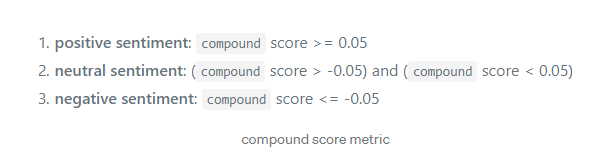

Compound é uma métrica própria do Vader para verificar a polaridade da frase, conforme a imagem acima.
Com um score médio de 0.18 aproximadamente, é possivel concluir que os Tweets do Trump são de forma geral positivos, para minha surpresa.

Provavelmente com tratamentos de textos o resultado seria melhor (mais preciso)

# Referências bibliográficas
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f